In [42]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [43]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92,45.0,27.0,31.0,0.0
1,85.0,64,NaN,NaN,23.0,NaN
2,86.0,54,33.0,16.0,54.0,0.0
3,91.0,78,34.0,24.0,36.0,0.0
4,NaN,55,NaN,NaN,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54,25.0,22.0,35.0,4.0
341,89.0,48,NaN,NaN,14.0,NaN
342,85.0,52,22.0,23.0,34.0,4.0
343,95.0,93,21.0,NaN,NaN,NaN


In [44]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
int64		column 2	0
float64		column 3	44
float64		column 4	134
float64		column 5	90
float64		column 6	112


In [45]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,323.000000,345.000000,301.000000,211.000000,255.000000,233.000000
mean,90.170279,69.869565,30.604651,24.350711,37.227451,3.227468
std,4.449731,18.347670,18.919651,9.409227,36.842013,2.923555
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,24.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,42.500000,5.000000
max,103.000000,138.000000,155.000000,82.000000,225.000000,16.000000


<AxesSubplot:>

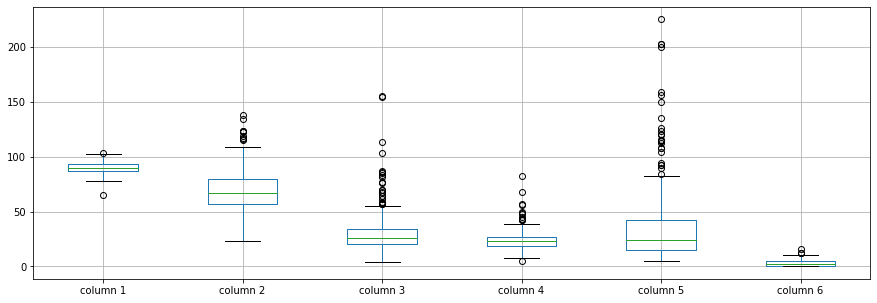

In [46]:
df.boxplot(return_type='axes', figsize=(15,5))

In [47]:
df.mean()

column 1    90.170279
column 2    69.869565
column 3    30.604651
column 4    24.350711
column 5    37.227451
column 6     3.227468
dtype: float64

In [48]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.040580,0.127129,0.115800,0.183127,0.266539
column 2,0.040580,1.000000,0.043610,-0.016260,0.127573,-0.019902
column 3,0.127129,0.043610,1.000000,0.809136,0.502798,0.068654
column 4,0.115800,-0.016260,0.809136,1.000000,0.496779,0.198436
column 5,0.183127,0.127573,0.502798,0.496779,1.000000,0.305776
column 6,0.266539,-0.019902,0.068654,0.198436,0.305776,1.000000


In [49]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [50]:
imputer = md.Midas(layer_structure = [6,6+54,6+54+54,6+54+54+54,6+54+54+54+54,6+54+54+54,6+54+54,6+54,6], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 241.08938743954613
Epoch: 1 , loss: 239.7389664422898
Epoch: 2 , loss: 242.6268107096354
Epoch: 3 , loss: 240.44547889346168
Epoch: 4 , loss: 240.58929806663878
Epoch: 5 , loss: 241.64530872163317
Epoch: 6 , loss: 241.8459269205729
Epoch: 7 , loss: 241.74955168224517
Epoch: 8 , loss: 243.03398786272322
Epoch: 9 , loss: 241.45595368884858
Epoch: 10 , loss: 243.33705575125558
Epoch: 11 , loss: 242.35346112932478
Epoch: 12 , loss: 242.96961248488654
Epoch: 13 , loss: 242.41981288364954
Epoch: 14 , loss: 241.8080524262928
Epoch: 15 , loss: 241.86553955078125
Epoch: 16 , loss: 241.51662263416108
Epoch: 17 , loss: 239.50590006510416
Epoch: 18 , loss: 236.98524693080358
Epoch: 19 , loss: 228.36455717540923
Epoch: 20 , loss: 216.0425727480934
Epoch: 21 , loss: 205.3387196858724
Epoch: 22 , loss: 199.59105718703498
Epoch: 23 , loss: 189.56159464518228
Epoch: 24 , loss: 185.30746241978235
Epoch: 25 , loss: 183.70

In [51]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [52]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [53]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [54]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0,0.000000,0.000000,0.00000,0.000000
1,0.000000,0,-45.491250,-20.511744,0.00000,2.330969
2,0.000000,0,0.000000,0.000000,0.00000,0.000000
3,0.000000,0,0.000000,0.000000,0.00000,0.000000
4,-84.997232,0,-4.131068,-9.419639,0.00000,0.000000
...,...,...,...,...,...,...
340,0.000000,0,0.000000,0.000000,0.00000,0.000000
341,0.000000,0,-31.813992,-21.813145,0.00000,-3.858961
342,0.000000,0,0.000000,0.000000,0.00000,0.000000
343,0.000000,0,0.000000,-20.197202,-39.21357,-4.575824


Calculating NRMSE Value

In [55]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [56]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [57]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

737.4812945958244

In [58]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [59]:
NRMS=numerator/denominator
NRMS


0.29267893860040595

In [30]:
new_df.iloc[66,:]

column 1    86.000000
column 2    54.000000
column 3    20.000000
column 4     0.036757
column 5     0.036862
column 6     0.037731
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,92,45.000000,27.000000,31.000000,0.000000
1,85.000000,64,0.039643,0.038691,23.000000,0.039779
2,86.000000,54,33.000000,16.000000,54.000000,0.000000
3,91.000000,78,34.000000,24.000000,36.000000,0.000000
4,0.035614,55,0.037632,0.036715,17.000000,0.000000
...,...,...,...,...,...,...
340,91.000000,54,25.000000,22.000000,35.000000,4.000000
341,89.000000,48,0.039467,0.038527,14.000000,0.039190
342,85.000000,52,22.000000,23.000000,34.000000,4.000000
343,95.000000,93,21.000000,0.039627,0.039765,0.040398


In [32]:
imputations[-1].to_excel("Bupa_AE_20(imp).xlsx", index=False, header=False)